<a href="https://colab.research.google.com/github/Deependrashukla/calculus2/blob/main/Gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$ GRADIENT \quad DESCENT $$
Gradient descent is an optimization algorithm which is commonly-used to train machine learning models and neural networks.
Gradient descent can be used to find local minima and maxima.The issue with it is , it gives approximate value not exact.
Here is formula for Gradient Descent.
$$θ = θ - α\cdot ∇f(θ) $$

In [27]:
import autograd.numpy as np
from autograd import grad
import math as m
import sympy as sym
import matplotlib.pyplot as plt

To find minima of sin(x).

In [28]:
#defining sin function so that we can differntiate it.
def my_function(x):
  return np.sin(x)
#This is how to differentiate function.
gradient_func = grad(my_function)
gradient = gradient_func(0.0)

print(gradient)

1.0


In [29]:
# to find minima of sin
def minsm(num, ita):
  '''Return point of minima

  para num: point from where we have to start
  para ita: small step taken during moving forwrd from near to point of minma
  '''
  x = num
  slope = m.cos(x)
  if -0.0001< slope <0.0001:
    return x
  x = x - ita*slope
  return minsm(x,ita)

print(minsm(m.pi,0.1))

4.7122954970435655


Here we are showing different methods of differentiation.
1) Numerical method  2) Symbolic method 3) Autograd method  
By using graph we shown that Symbolic and Autograd's graph are accurate that's why they overlap each other.

In [30]:
x_lst = [x/10 for x in range(260)]
# for numerical
a = 0.5
y_lst = []
for x in x_lst:
  y = (m.sin(x+a) - m.sin(x)) / a
  y_lst.append(y)


In [31]:
# to show that differentiation of sin is cos.
x = sym.symbols('x')
y = sym.diff(sym.sin(x), x)
print(y)

cos(x)


In [32]:
# for symbolic
y_new_lst = [] 
for x in x_lst:
  y = m.cos(x)
  y_new_lst.append(y)

In [33]:
# for automatic
y_auto_lst = []
gradient_func = grad(my_function)
for x in x_lst:
  y = gradient_func(x)
  y_auto_lst.append(y)



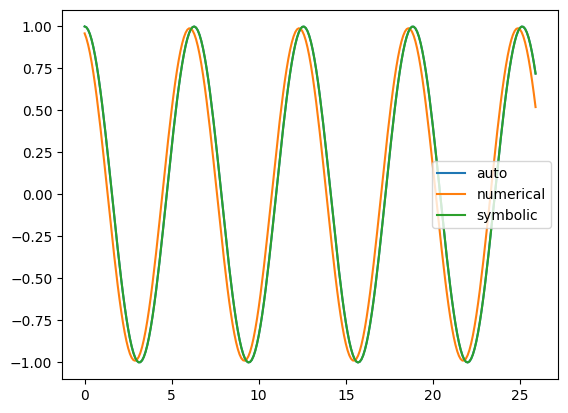

In [34]:
plt.plot(x_lst, y_auto_lst, label = 'auto')
plt.plot(x_lst,  y_lst, label = 'numerical')
plt.plot(x_lst,  y_new_lst, label = 'symbolic')
plt.legend()
plt.show()


To find minima of 
$$ f(x, y) = x^2 + y^2$$

In [35]:
def myfunction(X):
  x,y = X
  return x**2 + y**2 

gradient_func = grad(myfunction)
gradient = gradient_func([3.0, 2.0])
print(gradient[0])

#symbolic diff of x**2 + y**2
x, y = sym.symbols('x y')
f = x**2 + y**2
f_prime = sym.Matrix([sym.diff(f,x), sym.diff(f,y)])
print(f_prime)

6.0
Matrix([[2*x], [2*y]])


In [36]:
#to find point of minima of quadratic.
def minm(ita, X):
  '''Return point of minima

  para X: point from where we have to start
  para ita: small step taken during moving forwrd from near to point of minma
  '''
  gradient_func = grad(myfunction)
  gradient = gradient_func(X)
  while 0.00001 < gradient[0] and 0.00001 < gradient[1]:
    
    x = X[0] - gradient[0]*ita
    y = X[1] - gradient[1]*ita
    X = [x, y]
    gradient = gradient_func(X)
  return X

print(minm(0.1, [5.0, 2.0]))

[1.1972621413014761e-05, 4.7890485652059045e-06]
